In [29]:
import pandas as pd

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Extract unique years and months
unique_years = full_data['order_year'].unique()
unique_months = full_data['order_month'].unique()

# Sort the years and months for better readability
unique_years.sort()
unique_months.sort()

print(f"Unique Years: {unique_years}")
print(f"Unique Months: {unique_months}")

# Create a timeline DataFrame
timeline_data = []

# Map month numbers to names for better understanding
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Build the timeline data
for year in unique_years:
    for month in unique_months:
        timeline_data.append({
            'year': year,
            'month': month,
            'month_name': month_names[month]
        })

# Convert list of dictionaries to DataFrame
timeline_df = pd.DataFrame(timeline_data)

print(timeline_df)


Unique Years: [2016 2017 2018]
Unique Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]
    year  month month_name
0   2016      1    January
1   2016      2   February
2   2016      3      March
3   2016      4      April
4   2016      5        May
5   2016      6       June
6   2016      7       July
7   2016      8     August
8   2016      9  September
9   2016     10    October
10  2016     11   November
11  2016     12   December
12  2017      1    January
13  2017      2   February
14  2017      3      March
15  2017      4      April
16  2017      5        May
17  2017      6       June
18  2017      7       July
19  2017      8     August
20  2017      9  September
21  2017     10    October
22  2017     11   November
23  2017     12   December
24  2018      1    January
25  2018      2   February
26  2018      3      March
27  2018      4      April
28  2018      5        May
29  2018      6       June
30  2018      7       July
31  2018      8     August
32  2018      9  Septembe

Mean Squared Error: 1117497740.5844598
R^2 Score: 0.9869370694311186


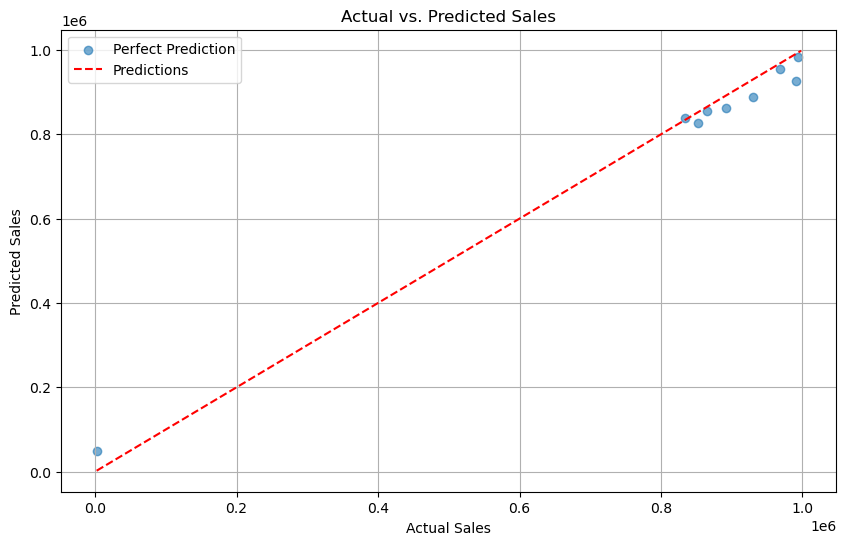

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Prepare the data by aggregating total sales by month and year
sales_data = full_data.groupby(['order_year', 'order_month', 'product_category_name_english'])['price'].sum().reset_index()

# Create a pivot table to get total sales for each category by month and year
sales_pivot = sales_data.pivot_table(index=['order_year', 'order_month'], columns='product_category_name_english', values='price', fill_value=0)

# Reset index to have a cleaner DataFrame
sales_pivot.reset_index(inplace=True)

# Add a total sales column
sales_pivot['total_sales'] = sales_pivot.sum(axis=1)

# Create lag features for total sales
sales_pivot['lag_1'] = sales_pivot['total_sales'].shift(1)  # 1 month lag
sales_pivot['lag_2'] = sales_pivot['total_sales'].shift(2)  # 2 months lag
sales_pivot['lag_3'] = sales_pivot['total_sales'].shift(3)  # 3 months lag

# Drop rows with NaN values that resulted from lagging
sales_pivot.dropna(inplace=True)

# Prepare features (X) and target variable (y)
X = sales_pivot.drop(['total_sales', 'order_year', 'order_month'], axis=1)  # Features (categories and lags)
y = sales_pivot['total_sales']  # Target variable (total sales)

# Create a time-based split: Use 2016 and 2017 for training and 2018 for testing
train_mask = sales_pivot['order_year'] < 2018
X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[~train_mask]
y_test = y[~train_mask]

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid()
plt.legend(['Perfect Prediction', 'Predictions'])
plt.show()


In [41]:
print(full_data.head())

                           order_id                       customer_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   
1  00018f77f2f0320c557190d7a144bdd3  f6dd3ec061db4e3987629fe6b26e5cce   
2  000229ec398224ef6ca0657da4fc703e  6489ae5e4333f3693df5ad4372dab6d3   
3  00024acbcdf0a6daa1e931b038114c75  d4eb9395c8c0431ee92fce09860c5a06   
4  00042b26cf59d7ce69dfabb4e55b4fd9  58dbd0b2d70206bf40e62cd34e84d795   

           customer_city customer_state product_category_name_english   price  \
0  campos dos goytacazes             RJ                    cool_stuff   58.90   
1        santa fe do sul             SP                      pet_shop  239.90   
2          para de minas             MG               furniture_decor  199.00   
3                atibaia             SP                     perfumery   12.99   
4        varzea paulista             SP                  garden_tools  199.90   

   order_year  order_month order_day_of_week  
0        2017            9 

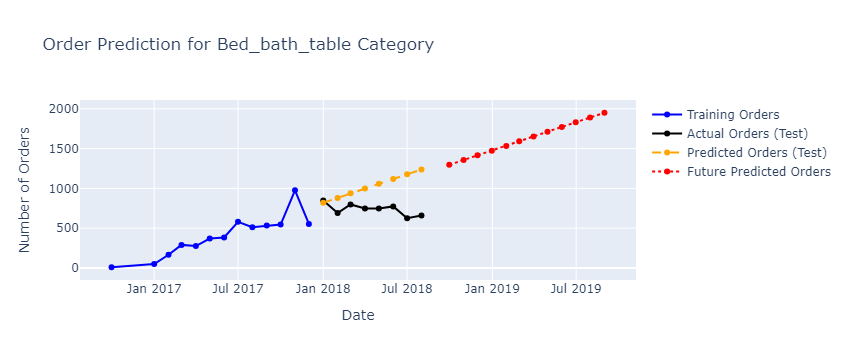

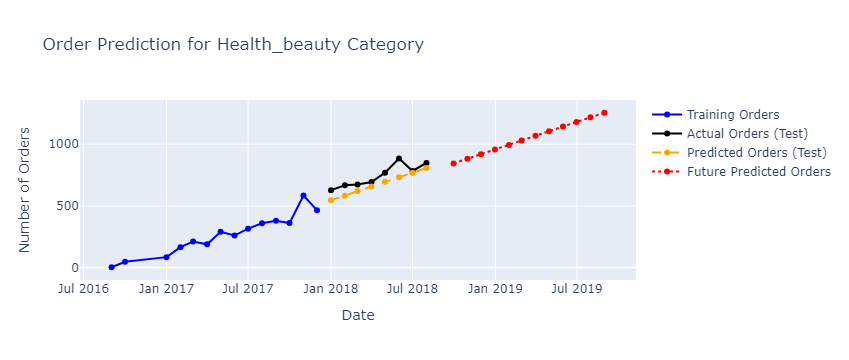

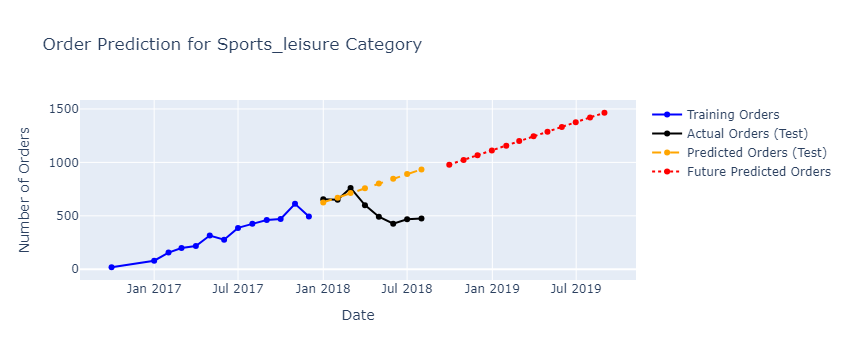

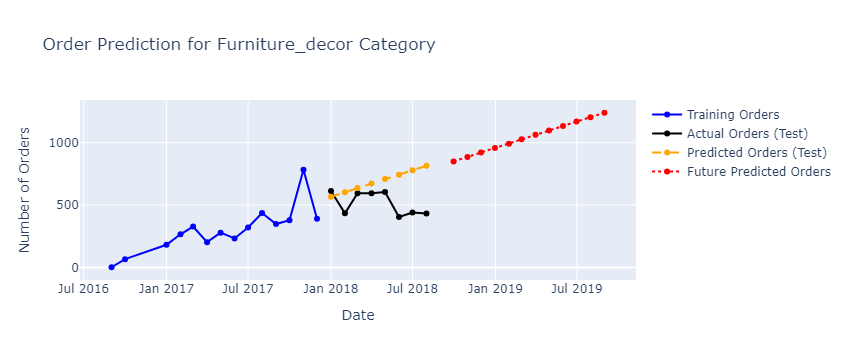

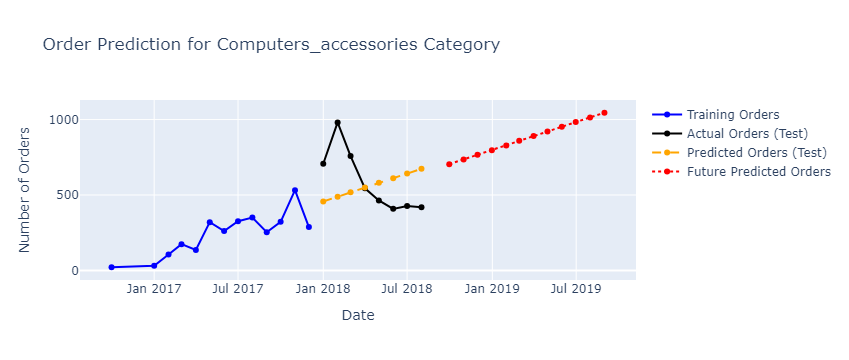

Evaluation Metrics:
                              MAE            MSE        RMSE   R² Score
bed_bath_table         299.298077  121680.099746  348.826747 -24.140516
health_beauty           67.412363    6107.970453   78.153506   0.184991
sports_leisure         233.070055   86335.607671  293.829215  -6.112333
furniture_decor        187.232418   53061.553158  230.350935  -5.940744
computers_accessories  222.332418   66196.036348  257.285904  -0.755269

The category with the highest predicted orders is: bed_bath_table with predicted orders of 8220.77
Future predicted orders for bed_bath_table for the next 12 months: 10496.97
Future predicted orders for health_beauty for the next 12 months: 10496.97
Future predicted orders for sports_leisure for the next 12 months: 10496.97
Future predicted orders for furniture_decor for the next 12 months: 10496.97
Future predicted orders for computers_accessories for the next 12 months: 10496.97


In [63]:
import pandas as pd
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Step 1: Calculate order frequency for each product category
order_frequency_by_category = (
    full_data.groupby('product_category_name_english')['order_id']
    .count()
    .reset_index()
)

# Step 2: Identify the top 5 categories by order frequency
top_categories = order_frequency_by_category.nlargest(5, 'order_id')['product_category_name_english'].tolist()

# Prepare a summary dictionary for the results
results_summary = {}
predicted_sales_summary = {}

# Number of future months to predict
future_months = 12  # For example, predicting for the next 12 months

# Step 3: Time Series Analysis for Each Top Category
for category_name in top_categories:
    # Filter data for the specific category
    category_data = full_data[full_data['product_category_name_english'] == category_name]

    # Group by year and month, counting the frequency
    category_monthly_sales = category_data.groupby(['order_year', 'order_month'])['order_id'].count().reset_index()

    # Create a new Date column for easy time-based indexing
    category_monthly_sales['date'] = pd.to_datetime(
        category_monthly_sales['order_year'].astype(str) + '-' + 
        category_monthly_sales['order_month'].astype(str).str.zfill(2) + '-01'
    )

    # Sort values by date
    category_monthly_sales = category_monthly_sales.sort_values(by='date').reset_index(drop=True)

    # Split data: 2016-2017 for training, 2018 for testing
    train_data = category_monthly_sales[category_monthly_sales['date'] < '2018-01-01'].copy()
    test_data = category_monthly_sales[category_monthly_sales['date'] >= '2018-01-01'].copy()

    # Set up features and target variable
    train_data.loc[:, 'time_index'] = range(len(train_data))
    test_data.loc[:, 'time_index'] = range(len(train_data), len(train_data) + len(test_data))
    X_train = train_data[['time_index']]
    y_train = train_data['order_id']  # Change from 'price' to 'order_id'
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the test set
    y_pred_test = model.predict(test_data[['time_index']])

    # Calculate evaluation metrics
    mae = mean_absolute_error(test_data['order_id'], y_pred_test)
    mse = mean_squared_error(test_data['order_id'], y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_data['order_id'], y_pred_test)

    # Store the results in the summary dictionary
    results_summary[category_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

    # Summarize predicted order frequency for future analysis
    predicted_sales_summary[category_name] = {
        'Predicted Orders': y_pred_test.sum()  # Sum of predicted orders for the testing period
    }

    # Future Predictions
    last_index = len(category_monthly_sales)  # Last index in the training data
    future_time_indices = pd.DataFrame(np.arange(last_index, last_index + future_months), columns=['time_index'])
    
    # Make future predictions
    future_predictions = model.predict(future_time_indices)

    # Prepare future dates for the predicted values
    last_date = category_monthly_sales['date'].max()
    future_dates = pd.date_range(start=last_date, periods=future_months + 1, freq='ME')[1:]

    # Plotting with Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_data['date'], y=y_train, mode='lines+markers', name='Training Orders', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=test_data['date'], y=test_data['order_id'], mode='lines+markers', name='Actual Orders (Test)', line=dict(color='black')))
    fig.add_trace(go.Scatter(x=test_data['date'], y=y_pred_test, mode='lines+markers', name='Predicted Orders (Test)', line=dict(dash='dash', color='orange')))
    fig.add_trace(go.Scatter(x=future_dates, y=future_predictions, mode='lines+markers', name='Future Predicted Orders', line=dict(dash='dot', color='red')))
    fig.update_layout(title=f'Order Prediction for {category_name.capitalize()} Category', xaxis_title='Date', yaxis_title='Number of Orders', hovermode="x unified")
    fig.show()

# Convert results summary to DataFrame for better visualization
results_df = pd.DataFrame(results_summary).T
predicted_sales_df = pd.DataFrame(predicted_sales_summary).T

# Display the results summary
print("Evaluation Metrics:")
print(results_df)

# Identify and display the category with the highest predicted orders
highest_orders_category = predicted_sales_df['Predicted Orders'].idxmax()
highest_orders_value = predicted_sales_df['Predicted Orders'].max()

print(f"\nThe category with the highest predicted orders is: {highest_orders_category} "
      f"with predicted orders of {highest_orders_value:.2f}")

# Display future predictions for all top categories
for category in top_categories:
    print(f"Future predicted orders for {category} for the next {future_months} months: {future_predictions.sum():.2f}")
